## Final Project Submission

Please fill out:
* Student name: Tim Musungu
* Student pace: Full time
* Scheduled project review date/time: n/a
* Instructor name: Samwel Karu
* Blog post URL: n/a


## Understanding the Business Problem and Data Question
- Our company is looking to expand into new industries in order to diversify its portfolio, specifically in purchasing and operating airplanes for commercial and private enterprises.
- As the resident Data Scientist, we are charged with identifying the aircraft that are the 'lowest risk' in order to inform business decisions in starting this new endeavour.
- Afterwards, we are to translate our findings into actionable insights for the head of the new aviation division to use.

## Understanding the Data
- We have been provided with a dataset that includes aviation accident data from 1962 to 2023 from the National Transportation Safety Board
- In addition to civil aviation accidents, the dataset covers selected incidents in the United States and in international waters

## Data Preparation
- We begin our data analysis by importing the appropriate packages to help in data preparation, specifically:
    - `Pandas` for data wrangling
    - `Matplotlib` for data visualization

In [531]:
# Import the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



- After importing the necessary packages, we load the data from `Aviation_Data.csv` using the Pandas package and save it as a dataframe - `df_aviation`.

- We then examine the first few records in the dataframe using the `.head()` method

In [532]:
df_aviation = pd.read_csv('./data/Aviation_Data.csv')
df_aviation.head()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


- After a cursory inspection of the dataframe in question, we get a general sense of the dataset, specifically:
    - the column names
    - the data types of the columns
    
- Afterwards, we inspect the data using the `.info()` method in order to to see:
    - the fields/features of the dataset, 
    - the total number of records for each field/feature, 
    - the fields/features with missing values

In [533]:
df_aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data preparation: Dealing with missing Data

- There are cleary a number of columns with missing values. Before dropping these rows, we can first identify the columns which are relevant to our analysis - those features that can help in answering our business problem: *which aircraft carriers are the lowest risk*
- Therefore, we will isolate the following columns for our analysis:
    - Columns that can help us identify the make and model of various aircraft: `Aircraft.Category `,`Make`
    - Columns that can help us assess the risk associated with such aircraft: `Event.Id `,`Event.Date `,`Investigation.Type`, `Total.Fatal.Injuries`, `Total.Serious.Injuries`,`Total.Minor.Injuries`, `Total.Uninjured`

In [534]:
# Isolate the relevant columns into a list
relevant_cols = ['Aircraft.Category',
                 'Make', 
                 'Event.Id',
                 'Event.Date',
                 'Investigation.Type',
                 'Total.Fatal.Injuries',
                 'Total.Serious.Injuries',
                 'Total.Minor.Injuries',
                 'Total.Uninjured']

In [535]:
# Extract the data associated with these columns from the dataframe
df_aviation = df_aviation[relevant_cols]
df_aviation

,Aircraft.Category,Make,Event.Id,Event.Date,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,NaN,Stinson,20001218X45444,1948-10-24,Accident,2.0,0.0,0.0,0.0
1,NaN,Piper,20001218X45447,1962-07-19,Accident,4.0,0.0,0.0,0.0
2,NaN,Cessna,20061025X01555,1974-08-30,Accident,3.0,NaN,NaN,NaN
3,NaN,Rockwell,20001218X45448,1977-06-19,Accident,2.0,0.0,0.0,0.0
4,NaN,Cessna,20041105X01764,1979-08-02,Accident,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
90343,NaN,PIPER,20221227106491,2022-12-26,Accident,0.0,1.0,0.0,0.0
90344,NaN,BELLANCA,20221227106494,2022-12-26,Accident,0.0,0.0,0.0,0.0
90345,Airplane,AMERICAN CHAMPION AIRCRAFT,20221227106497,2022-12-26,Accident,0.0,0.0,0.0,1.0
90346,NaN,CESSNA,20221227106498,2022-12-26,Accident,0.0,0.0,0.0,0.0


In [536]:
# Examine the resulting dataframe for missing values
df_aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft.Category       32287 non-null  object 
 1   Make                    88826 non-null  object 
 2   Event.Id                88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Investigation.Type      90348 non-null  object 
 5   Total.Fatal.Injuries    77488 non-null  float64
 6   Total.Serious.Injuries  76379 non-null  float64
 7   Total.Minor.Injuries    76956 non-null  float64
 8   Total.Uninjured         82977 non-null  float64
dtypes: float64(4), object(5)
memory usage: 6.2+ MB


In [537]:
# Seeing the number of missing values by column
df_aviation.isna().sum()

Aircraft.Category         58061
Make                       1522
Event.Id                   1459
Event.Date                 1459
Investigation.Type            0
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
dtype: int64

- Looking at the information above, we can make some interesting observations about missing values in this dataset:

    - There are some columns with a very high proportion of missing values: `Aircraft.Category` and `Air.carrier`. These columns were meant to help us identify the type of aircraft associated with an accident or incident. Since dropping the rows with missing values is not tenable since we will lose a lot of data - we need to decide on placeholder values for the missing values in question or just drop the columns themselves.

    - Some columns have a low proportion of missing values: `Make` and `Model`. Since these columns are also useful in identifying aircraft types, we need to find a placeholder value for the missing values in these columns.

    - Other columns contain a moderate proportion of missing values,i.e, all columns associated with injuries in the dataset - `Total.Fatal.Injuries`,`Total.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured`. Since these columns represent numerical data that is important in our analysis (in assessing aircraft risk), we can replace missing values with a generic placeholder like 'None' or '0' to represent aircraft incidents that didn't result in injuries .

    - Columns like `Event.Id` and `Event.Date` have the exact same number of missing values (**1459**) which points to a crucial gap in the dataset since these records represent aircraft incidents that have no recorded IDs or dates in the dataset. These records are not likely to be useful to us in assessing aircraft risk and we should consider dropping them from our dataset.

- Therefore, we will drop some records containing missing values and find placeholders for others. In short:

    - Drop records with missing values in the following columns: `Event.Id` and `Event.Date`

    - Find placeholder values for missing values in the following columns: `Aircraft.Category`, `Air.carrier`,`Make`, `Model`,`Total.Fatal.Injuries`,`Total.Serious.Injuries`,`Total.Minor.Injuries` and `Total.Uninjured`

In [538]:
# Drop missing values
df_aviation = df_aviation.dropna(subset=['Event.Id','Event.Date'])
df_aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft.Category       32287 non-null  object 
 1   Make                    88826 non-null  object 
 2   Event.Id                88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Investigation.Type      88889 non-null  object 
 5   Total.Fatal.Injuries    77488 non-null  float64
 6   Total.Serious.Injuries  76379 non-null  float64
 7   Total.Minor.Injuries    76956 non-null  float64
 8   Total.Uninjured         82977 non-null  float64
dtypes: float64(4), object(5)
memory usage: 6.8+ MB


In [539]:
# Find Placeholder values

df_aviation = df_aviation.fillna({'Aircraft.Category':'Unknown','Make':'Unknown'})

df_aviation = df_aviation.fillna({'Total.Fatal.Injuries': 0,'Total.Serious.Injuries': 0,'Total.Minor.Injuries':0, 'Total.Uninjured':0})

df_aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft.Category       88889 non-null  object 
 1   Make                    88889 non-null  object 
 2   Event.Id                88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Investigation.Type      88889 non-null  object 
 5   Total.Fatal.Injuries    88889 non-null  float64
 6   Total.Serious.Injuries  88889 non-null  float64
 7   Total.Minor.Injuries    88889 non-null  float64
 8   Total.Uninjured         88889 non-null  float64
dtypes: float64(4), object(5)
memory usage: 6.8+ MB


## Data preparation: Dealing with Inconsistent Data
- Next, we need to ensure that (non-numeric) data is consistent in the fields represented in our Dataframe - this will be important when we want to generate insights about our categorical data (especially in visualizations)
- We can check on the consistency the values in the categorical columns by generating a list of unique values using `unique` for our categorical columns

In [540]:
# Isolate our categorical columns
categorical_columns = ['Investigation.Type','Aircraft.Category','Make']

# Generate a list of unique values for each column
for column in categorical_columns:
    print("-" * 80) # separator line
    print(f"Unique values in {column}")
    print("-" * 80) # separator line
    print(df_aviation[column].value_counts())
    print("-" * 80) # separator line
    print("Unique values as a list:",sorted(list(df_aviation[column].unique())))
    print("-" * 80) # separator line
    print(f"Total number of Unique values in {column}:", len(list(df_aviation[column].unique())))
    print("-" * 80) # separator line


--------------------------------------------------------------------------------
Unique values in Investigation.Type
--------------------------------------------------------------------------------
Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64
--------------------------------------------------------------------------------
Unique values as a list: ['Accident', 'Incident']
--------------------------------------------------------------------------------
Total number of Unique values in Investigation.Type: 2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Unique values in Aircraft.Category
--------------------------------------------------------------------------------
Unknown              56616
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift        

- We can observe consistent data values in two of the categorical columns: `Investigation.Type` and `Aircraft.Category`
- In the case of the `Make` column, we are faced with some problemns: 
    - a large number of unique values (**>8000) - which would make our analysis & visualization difficult 
    - many values that are similarly named but with different cases or additional words used, see the examples below:
        - _'AEROFAB INC'_ and _'AEROFAB INC.'_
        - _'AEROPRAKT'_ and _'AEROPRAKT MANUFACTURING SP ZOO'_
        - _'AEROPRO CZ'_ and _'AEROPRO CZ S R O'_ among others
- Thus, we need a way to reduce the number of unique values as well as standardize the data values (or simply **drop** the categorical column as a unit of analysis)


#### Cleaning the `Make` column (grouping)
- For our purposes, we attempted  to reduce the number of unique values in the `Make` column rather than drop it. This is because our business question needs us to identify aircraft and the 'make' of an aircraft (whether it is a 'Cessna' or a 'Piper') would be an important consideration.
- The general approach involved doing the following: 
    - grouping low-frequency values into a single category called *'Other'* (we define 'low-frequency' categories as those which occur less than *200* times - this threshold was specific to this feature)
    - standardizing how the resulting categories are named using a mapping dictionary

In [629]:
# Group into broader categories using a threshold (200 occurences)

threshold = 200 # Categories with fewer than 200 occurrences will be grouped
counts_of_categories = df_aviation['Make'].value_counts()
rare_categories = counts_of_categories[counts_of_categories < threshold].index
df_aviation['Make'] = df_aviation['Make'].replace(rare_categories, 'Other')

# Standardizing the categories using a mapping dictionary

make_mapping = {
    'CESSNA': 'Cessna',
    'PIPER' : 'Piper',
    'BEECH' : 'Beech',
    'BOEING': 'Boeing',
    'BELL' : 'Bell',
    'AIR TRACTOR INC': 'Air Tractor',
    'AIRBUS' : 'Airbus',
    'Grumman American' : 'Grumman',
    'Mcdonnell Douglas': 'Douglas',
    'MOONEY' : 'Mooney',
    'ROBINSON': 'Robinson', 
    'ROBINSON HELICOPTER': 'Robinson',
}

df_aviation['Make'] = df_aviation['Make'].replace(make_mapping)
counts_of_categories = df_aviation['Make'].value_counts()


In [630]:
# Observing the output
print(df_aviation['Make'].unique(),'\n')
print("List of categories:", sorted(list(counts_of_categories.index)))
print("Number of categories:", len(list(counts_of_categories.index)))

['Stinson' 'Piper' 'Cessna' 'Rockwell' 'Douglas' 'North American' 'Beech'
 'Bellanca' 'Other' 'Enstrom' 'Bell' 'Grumman' 'Maule' 'Air Tractor'
 'Aerospatiale' 'Mooney' 'Boeing' 'Hughes' 'De Havilland' 'Aeronca'
 'Taylorcraft' 'Robinson' 'Schweizer' 'Hiller' 'Luscombe' 'Champion'
 'Aero Commander' 'Ayres' 'CIRRUS DESIGN CORP' 'Airbus'] 

List of categories: ['Aero Commander', 'Aeronca', 'Aerospatiale', 'Air Tractor', 'Airbus', 'Ayres', 'Beech', 'Bell', 'Bellanca', 'Boeing', 'CIRRUS DESIGN CORP', 'Cessna', 'Champion', 'De Havilland', 'Douglas', 'Enstrom', 'Grumman', 'Hiller', 'Hughes', 'Luscombe', 'Maule', 'Mooney', 'North American', 'Other', 'Piper', 'Robinson', 'Rockwell', 'Schweizer', 'Stinson', 'Taylorcraft']
Number of categories: 30


- Our standardization exercise had us reduce the number of unique values in the `Make` column from over *8000* to *30* (a much more manageable figure)

#### Cleaning the `Aircraft.Category` Column (recoding)
- Looking at the output of the `.value_counts()` for the `Aircraft.Category` column, we see that a majority of the values (**>60%**) are 'Unknown'

In [631]:
print("-" * 60)
print(f"\n🔹Aircraft.Category - Percentage Distribution:\n")
print("-" * 60)
print((df_aviation['Aircraft.Category'].value_counts(normalize=True)*100).round(2).astype(str) + '%')
print("-" * 60)

------------------------------------------------------------

🔹Aircraft.Category - Percentage Distribution:

------------------------------------------------------------
Airplane             89.69%
Helicopter            8.34%
Glider                1.18%
Balloon               0.26%
Gyrocraft             0.19%
Weight-Shift          0.18%
Powered Parachute      0.1%
Ultralight            0.03%
WSFT                  0.01%
Powered-Lift          0.01%
Blimp                  0.0%
UNK                    0.0%
Rocket                 0.0%
ULTR                   0.0%
Name: Aircraft.Category, dtype: object
------------------------------------------------------------


- We need to find a way to infer the category of the particular aircraft based on information we already have, i.e, the make of the aircraft (`Make` column). We reason that if we know the make, we can reasonably infer the aircraft category - if the aircraft make is an 'Airbus' then we can assume the aircraft category is 'Airplane'
- Thus, we cross-tabulate the `Aircraft.Category` and `Make` columns to see this relationship

In [632]:
category_make_tab = pd.crosstab(df_aviation['Make'],df_aviation['Aircraft.Category'])
category_make_tab


Aircraft.Category,Airplane,Balloon,Blimp,Glider,Gyrocraft,Helicopter,Powered Parachute,Powered-Lift,Rocket,ULTR,UNK,Ultralight,WSFT,Weight-Shift
Make,,,,,,,,,,,,,,
Aero Commander,360,0,0,0,0,0,0,0,0,0,0,0,0,0
Aeronca,487,0,0,0,0,0,0,0,0,0,0,0,0,0
Aerospatiale,2,0,0,0,0,340,0,0,0,0,0,0,0,0
Air Tractor,812,0,0,0,0,0,0,0,0,0,0,0,0,0
Airbus,230,0,0,0,0,20,0,1,0,0,0,0,0,0
Ayres,215,0,0,0,0,0,0,0,0,0,0,0,0,0
Beech,5372,0,0,0,0,0,0,0,0,0,0,0,0,0
Bell,2,0,0,0,0,2720,0,0,0,0,0,0,0,0
Bellanca,886,0,0,0,0,0,0,0,0,0,0,0,0,0


- We observe that, for most records, knowing the aircraft *make* allows us to infer the aircraft *category* - we do this by inspecting the category with the highest frequency (**dominant category**) other than *'Unknown'*.

    >  In order to identify the **dominant category**, we establish a **dominance threshold** , i.e, if the category accounts for **>50%** of the values, then it is the **dominant category**

- We want to create a dictionary mapping the aircraft `Make` to the dominant categories, e.g, `{'Airbus': 'Airplane',...}`. With this knowledge, we can then recode the *'Unknown'* value to the corresponding dominant category with confidence.


In [633]:
category_make_tab = pd.crosstab(df_aviation['Make'],df_aviation['Aircraft.Category'])

dominant_cats= {}

for make in category_make_tab.index:

    # Isolate the row of the current make as a Data Series
    make_series = category_make_tab.loc[make]

    # Filter out 'Unknown' values and zeros
    make_series = make_series[make_series.index != 'Unknown'] # filter out unknown values
    make_series = make_series[make_series.values != 0] # filter out zeros
    
    # Calculate the dominance threshold (50%)
    cat_count = make_series.values
    total_count = cat_count.sum()
    cat_dominant = make_series[(cat_count / total_count * 100) > 50]
    
    # Create a dictionary entry 
    dominant_cats[make] = ', '.join(cat_dominant.index.astype(str)) # 


# Recode all 'Unknown' values in the 'Aircraft.Category column:
for make, cats in dominant_cats.items():
    df_aviation.loc[
        (df_aviation['Aircraft.Category'] == 'Unknown') &
        (df_aviation['Make'] == make),
        'Aircraft.Category'
    ] = cats


- Looking at our output, we see that the 'Unknown' values have been successfully recoded

In [634]:
# Observing the output
print("-" * 60)
print(f"\n🔹Aircraft.Category - Percentage Distribution:\n")
print("-" * 60)
print((df_aviation['Aircraft.Category'].value_counts(normalize=True)*100).round(2).astype(str) + '%')
print("-" * 60)


------------------------------------------------------------

🔹Aircraft.Category - Percentage Distribution:

------------------------------------------------------------
Airplane             89.69%
Helicopter            8.34%
Glider                1.18%
Balloon               0.26%
Gyrocraft             0.19%
Weight-Shift          0.18%
Powered Parachute      0.1%
Ultralight            0.03%
WSFT                  0.01%
Powered-Lift          0.01%
Blimp                  0.0%
UNK                    0.0%
Rocket                 0.0%
ULTR                   0.0%
Name: Aircraft.Category, dtype: object
------------------------------------------------------------


## Data Analysis: Aggregation and Visualization
- After we have dealt with missing values, we proceed with Exploratory Data Analysis (EDA) in which we examine various features of our dataset as well as potential relationships between various features, namely:
    
    - summary statistics for *numeric data* (all numerical columns) : mean, standard deviation,percentiles

    - summary statistics for *non-numeric data* (all categorical columns): distribution of categories, Top 10 categories by value counts


### Data Analysis: Summary statistics for numerical columns

> First, let's have a look at our dataset using `.head()` and `.info`

In [635]:
df_aviation.head()

,Aircraft.Category,Make,Event.Id,Event.Date,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
0,Airplane,Stinson,20001218X45444,1948-10-24,Accident,2.0,0.0,0.0,0.0,2.0
1,Airplane,Piper,20001218X45447,1962-07-19,Accident,4.0,0.0,0.0,0.0,4.0
2,Airplane,Cessna,20061025X01555,1974-08-30,Accident,3.0,0.0,0.0,0.0,3.0
3,Airplane,Rockwell,20001218X45448,1977-06-19,Accident,2.0,0.0,0.0,0.0,2.0
4,Airplane,Cessna,20041105X01764,1979-08-02,Accident,1.0,2.0,0.0,0.0,3.0


In [636]:
df_aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft.Category       88889 non-null  object 
 1   Make                    88889 non-null  object 
 2   Event.Id                88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Investigation.Type      88889 non-null  object 
 5   Total.Fatal.Injuries    88889 non-null  float64
 6   Total.Serious.Injuries  88889 non-null  float64
 7   Total.Minor.Injuries    88889 non-null  float64
 8   Total.Uninjured         88889 non-null  float64
 9   Total.Injured           88889 non-null  float64
dtypes: float64(5), object(5)
memory usage: 7.5+ MB


- We can see the results of our efforts at data preparation - relevant columns and rows with no missing values

- Afterwards, we will compute summary statistics for the numerical columns

In [637]:
# Isolate the numerical columns
numerical_columns = ['Total.Uninjured','Total.Minor.Injuries','Total.Serious.Injuries', 'Total.Fatal.Injuries']

# Summary stats

df_aviation[numerical_columns].describe()

,Total.Uninjured,Total.Minor.Injuries,Total.Serious.Injuries,Total.Fatal.Injuries
count,88889.000000,88889.000000,88889.000000,88889.000000
mean,4.971245,0.309127,0.240491,0.564761
std,27.002011,2.083715,1.434614,5.126649
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000
max,699.000000,380.000000,161.000000,349.000000


- We can make some preliminary observations on the data:
    - **Extreme right skew**: The dataset seems to be highly skewed or sparse, as indicated by the 25th, 50th and 75th percentiles for most columns - over 75% of the incidents reported no injuries.
    - **Non-zero mean**: Regardless of the above, we observe a non-zero mean on all columns indicating that a small proportion of high values in the dataset are responsible for pulling the mean up - a small number of incidents with mass casualties
    - **High standard deviation**: We observe a high standard deviation relative to the mean, pointing to the existence of outliers (incidents with very high casualties and injuries).

- We can confirm the *sparsity* of the dataset by doing a count of non-zero values in the numerical columns and comparing it to the total count of records (~90,000 records):

In [638]:
# Checking the count of non-zero values
df = df_aviation[numerical_columns]
print((df != 0).sum())

Total.Uninjured           53098
Total.Minor.Injuries      15502
Total.Serious.Injuries    13090
Total.Fatal.Injuries      17813
dtype: int64


- Or by investigating the percentiles at a more granular level, which will reveal that:
    - **90%** of incidents have at most 1 minor or serious injury
    - **80%** of incidents have at  most 1 fatal injury

In [639]:
# Percentiles at 10% intervals
ten_percentiles = [i / 10 for i in range(1,10)]

# 10-Percentiles for all numerical columns
df_ten_percentiles = df_aviation[numerical_columns].quantile(ten_percentiles)
print(df_ten_percentiles)



     Total.Uninjured  Total.Minor.Injuries  Total.Serious.Injuries  \
0.1              0.0                   0.0                     0.0   
0.2              0.0                   0.0                     0.0   
0.3              0.0                   0.0                     0.0   
0.4              0.0                   0.0                     0.0   
0.5              1.0                   0.0                     0.0   
0.6              1.0                   0.0                     0.0   
0.7              2.0                   0.0                     0.0   
0.8              2.0                   0.0                     0.0   
0.9              3.0                   1.0                     1.0   

     Total.Fatal.Injuries  
0.1                   0.0  
0.2                   0.0  
0.3                   0.0  
0.4                   0.0  
0.5                   0.0  
0.6                   0.0  
0.7                   0.0  
0.8                   1.0  
0.9                   2.0  


- In general, there are much fewer incidents which lead to injuries and deaths, and that those incidents contribute the most to total injuries and deaths (*outliers*).

- These observations are further validated when looking at the histograms and boxplots for each numerical column:
    - On the histogram, we used a logarithmic scale to make the smaller values more prominent given the extreme right-skew in the dataset

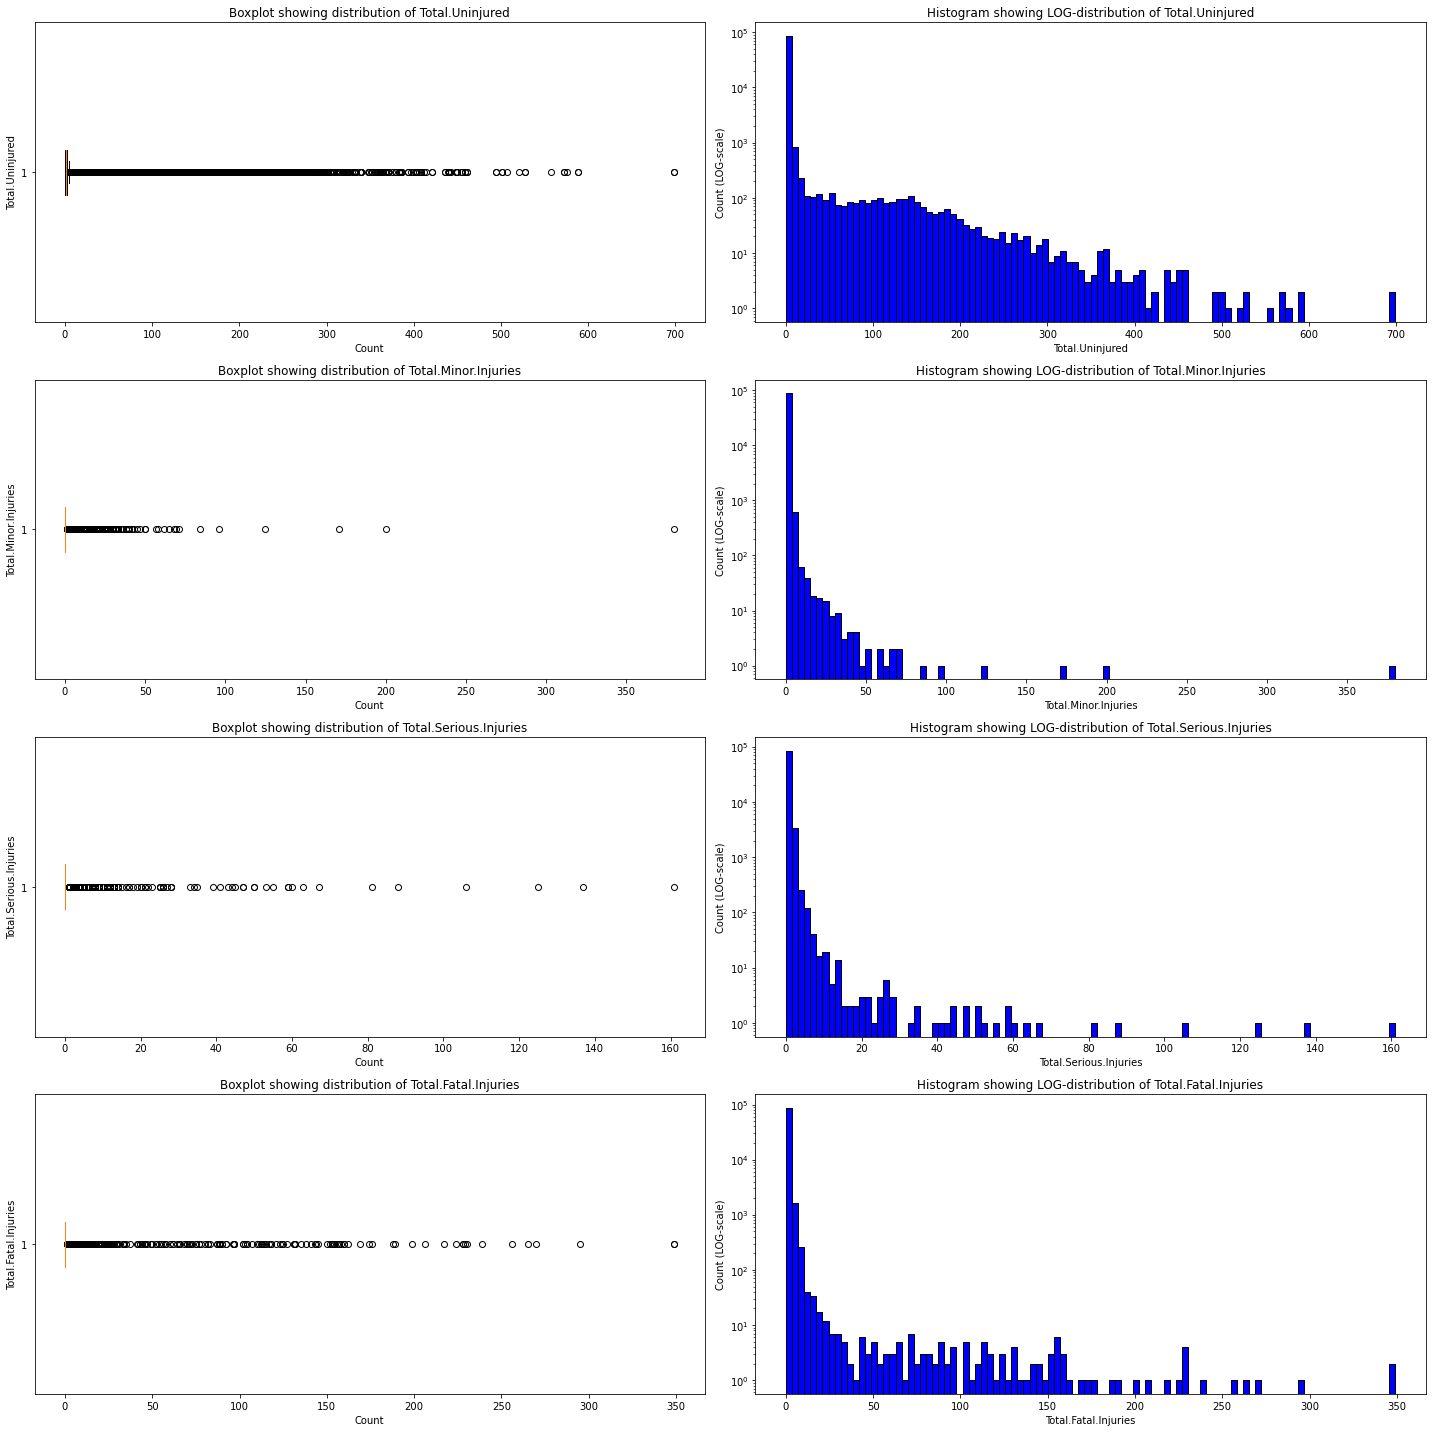

In [640]:
plt.figure(figsize=(20,len(numerical_columns)*5))

for index, col in enumerate(numerical_columns,1):
    # Boxplot on top
    plt.subplot(len(numerical_columns), 2, 2 * index - 1)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot showing distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    # Histogram below
    plt.subplot(len(numerical_columns),2, 2 * index)
    plt.hist(df[col], bins=100, edgecolor='black', color='blue')
    plt.yscale('log')
    plt.title(f'Histogram showing LOG-distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count (LOG-scale)')

plt.tight_layout()
plt.show()



### Data Analysis: Summary statistics for categorical columns

- For the categorical columns, we intend to implement the following analyses:

    - **Frequency Analysis**: how often do particular categories occur? What are the 10 ten categories in each column?

    - **Percentage Distribution**: what percentage of records belong to each category? (similar to a frequency analysis)

In [641]:
# view the categorical columns again
categorical_columns

['Investigation.Type', 'Aircraft.Category', 'Make']

--------------------------------------------------------------------------------
Summary for 'Investigation.Type' column
------------------------------------------------------------
Total number of unique values: 2

List of unique values:
['Accident' 'Incident']
------------------------------------------------------------
Investigation.Type - Percentage Distribution:
------------------------------------------------------------
Accident    95.64%
Incident     4.36%
Name: Investigation.Type, dtype: object
------------------------------------------------------------
Investigation.Type - Top 10 categories:
------------------------------------------------------------


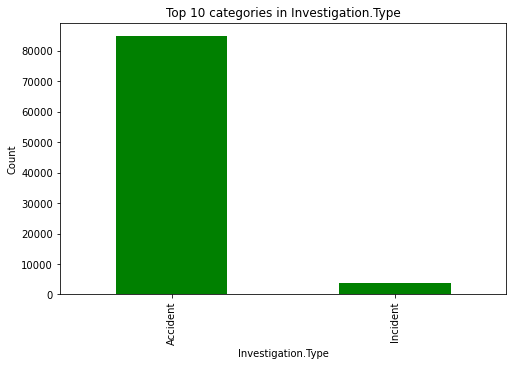

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Summary for 'Aircraft.Category' column
------------------------------------------------------------
Total number of unique values: 14

List of unique values:
['Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute' 'Rocket' 'WSFT'
 'UNK' 'ULTR']
------------------------------------------------------------
Aircraft.Category - Percentage Distribution:
------------------------------------------------------------
Airplane             89.69%
Helicopter            8.34%
Glider                1.18%
Balloon               0.26%
Gyrocraft             0.19%
Weight-Shift          0.18%
Powered Parachute      0.1%
Ultralight            0.03%
WSFT                  0.01%
Powered-Lift          0.01%
Blimp                  0.0%
UNK                    0.0%
Rocket            

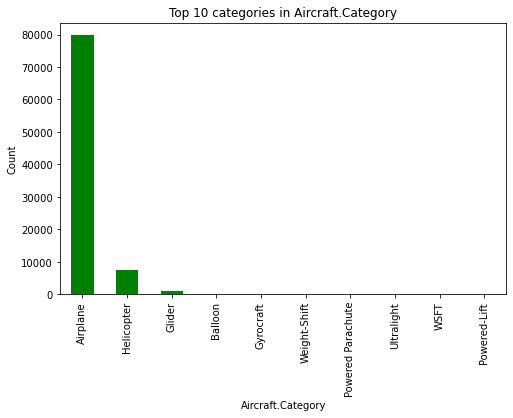

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Summary for 'Make' column
------------------------------------------------------------
Total number of unique values: 30

List of unique values:
['Stinson' 'Piper' 'Cessna' 'Rockwell' 'Douglas' 'North American' 'Beech'
 'Bellanca' 'Other' 'Enstrom' 'Bell' 'Grumman' 'Maule' 'Air Tractor'
 'Aerospatiale' 'Mooney' 'Boeing' 'Hughes' 'De Havilland' 'Aeronca'
 'Taylorcraft' 'Robinson' 'Schweizer' 'Hiller' 'Luscombe' 'Champion'
 'Aero Commander' 'Ayres' 'CIRRUS DESIGN CORP' 'Airbus']
------------------------------------------------------------
Make - Percentage Distribution:
------------------------------------------------------------
Cessna                30.54%
Other                 25.56%
Piper                 16.73%
Beech                  6.04%
Boeing                 3.09%
Bell                   3.06%
Robinson               1.63%

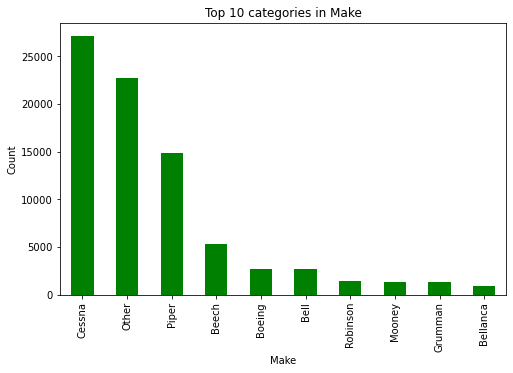

--------------------------------------------------------------------------------


In [642]:
# Summary statistics for categorical columns

for column in categorical_columns:
    print("-" * 80) # separator line
    print(f"Summary for '{column}' column")
    print("-" * 60) # separator line

    # Frequency analysis
    print(f"Total number of unique values: {len(df_aviation[column].unique())}\n")
    print("List of unique values:")
    print(df_aviation[column].unique())
    
    
    #Percentage distribution
    print("-" * 60) # separator line
    print(f"{column} - Percentage Distribution:")
    print("-" * 60) # separator line

    print((df_aviation[column].value_counts(normalize=True) * 100).round(2).astype(str) + '%')
    
    
    # Bar chart of the Top 10 categories in each column
    print("-" * 60) # separator line
    print(f"{column} - Top 10 categories:")
    print("-" * 60) # separator line

    plt.figure(figsize=(8,5))
    df_aviation[column].value_counts().head(10).plot(kind='bar', color='green')
    plt.title(f"Top 10 categories in {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show();

    print("-" * 80) # another separator line
    

- Some general observations on the categorical columns:

    - **Incident.Type**: This column only has 2 categories (*'Accident'* and *'Incident'*) - the *'Accident'* category accounts for **95%** of all records.

    - **Aircraft.Category**: This column has 14 distinct categories. The top 3 categories (*'Airplane'*, *'Helicopter'*, *'Glider'*) account for **99%** of all records.

    - **Make**: This column has 31 distinct categories with *'Other'* being a catch-all category for all records that occurred less than 200 times (**25%** of total records). That category aside, the top 5 categories (*'Cessna'*, *'Piper'*, *'Beech'*, *'Boeing'* and *'Bell'*) account for **60%** of all records. 

### Data Analysis: Examining Injury and Casualty Rates across Categories

- We proceed with our analysis by coming back to our business question: 
    > **Which aircraft has the lowest risk of injury or casualties?**

- Answering this question involves looking at **total** and **average** injury and casualty rates across our categories of interest: the aircraft category (`Aircraft.Category`) and aircraft make (`Make`). 

- We can also include the type of investigation (`Investigation.Type`) the incident triggered - whether it was an *accident* or *incident*. We are making the assumption that incidents are less fatal than accidents.

> First and foremost, we should add a new feature into the dataset - `Total.Injured` - to represent the sum total of all injuries, whether minor, serious or fatal. This should be helpful in generating insight when placed side by side with `Total.Uninjured`.

In [643]:
df_aviation ['Total.Injured'] = df[['Total.Minor.Injuries','Total.Serious.Injuries', 'Total.Fatal.Injuries']].sum(axis=1)
df_aviation.head()

,Aircraft.Category,Make,Event.Id,Event.Date,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
0,Airplane,Stinson,20001218X45444,1948-10-24,Accident,2.0,0.0,0.0,0.0,2.0
1,Airplane,Piper,20001218X45447,1962-07-19,Accident,4.0,0.0,0.0,0.0,4.0
2,Airplane,Cessna,20061025X01555,1974-08-30,Accident,3.0,0.0,0.0,0.0,3.0
3,Airplane,Rockwell,20001218X45448,1977-06-19,Accident,2.0,0.0,0.0,0.0,2.0
4,Airplane,Cessna,20041105X01764,1979-08-02,Accident,1.0,2.0,0.0,0.0,3.0


In [644]:
# Isolate Numerical columns
numerical_columns = ['Event.Id','Total.Injured','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']

### Analysis 1: Total Injuries and Casualties by Category

#### Analysis 1.1 : Total Injuries and Casualties by `Investigation.Type`

In [645]:
# Group by Investigation.Type and aggregate the total number of injuries and casualties

df_total_investigationType = df_aviation.groupby('Investigation.Type').sum(numerical_columns)
df_total_investigationType

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Investigation.Type,,,,,
Accident,50179.0,21071.0,26296.0,254974.0,97546.0
Incident,22.0,306.0,1182.0,186915.0,1510.0


### Analysis 1.2 : Total Injuries and Casualties by `Aircraft.Category`

In [646]:
# Group by Aircraft.Category and aggregate the total number of injuries and casualties

df_total_aircraftCategory = df_aviation.groupby('Aircraft.Category').sum(numerical_columns).sort_values('Total.Uninjured', ascending=False)
df_total_aircraftCategory.head(5)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Aircraft.Category,,,,,
Airplane,46524.0,18736.0,24387.0,429679.0,89647.0
Helicopter,3325.0,2073.0,2511.0,10414.0,7909.0
Balloon,43.0,186.0,185.0,842.0,414.0
Glider,162.0,216.0,227.0,783.0,605.0
Gyrocraft,44.0,55.0,30.0,84.0,129.0


In [647]:
df_total_aircraftCategory = df_aviation.groupby('Aircraft.Category').sum(numerical_columns).sort_values(by=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], ascending=False)
df_total_aircraftCategory.head(5)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Aircraft.Category,,,,,
Airplane,46524.0,18736.0,24387.0,429679.0,89647.0
Helicopter,3325.0,2073.0,2511.0,10414.0,7909.0
Glider,162.0,216.0,227.0,783.0,605.0
Weight-Shift,67.0,58.0,50.0,47.0,175.0
Gyrocraft,44.0,55.0,30.0,84.0,129.0


### Analysis 1.3 : Total Injuries and Casualties by `Make`

In [648]:
# Group by Make and aggregate the total number of injuries and casualties

df_total_aircraftMake = df_aviation.groupby('Make').sum(numerical_columns).sort_values('Total.Uninjured', ascending=False)
df_total_aircraftMake.head(10)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Make,,,,,
Boeing,8748.0,2157.0,2761.0,208375.0,13666.0
Other,12355.0,6193.0,6544.0,87601.0,25092.0
Douglas,2233.0,613.0,1694.0,49947.0,4540.0
Cessna,9641.0,4894.0,6876.0,34423.0,21411.0
Piper,6689.0,3059.0,3757.0,17832.0,13505.0
Airbus,1212.0,179.0,72.0,16759.0,1463.0
Beech,3784.0,1095.0,1341.0,7891.0,6220.0
Bell,1332.0,878.0,1122.0,3072.0,3332.0
Aerospatiale,311.0,135.0,197.0,2544.0,643.0


In [649]:
df_total_aircraftMake = df_aviation.groupby('Make').sum(numerical_columns).sort_values(by=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], ascending=False)
df_total_aircraftMake.head(10)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Make,,,,,
Other,12355.0,6193.0,6544.0,87601.0,25092.0
Cessna,9641.0,4894.0,6876.0,34423.0,21411.0
Boeing,8748.0,2157.0,2761.0,208375.0,13666.0
Piper,6689.0,3059.0,3757.0,17832.0,13505.0
Beech,3784.0,1095.0,1341.0,7891.0,6220.0
Douglas,2233.0,613.0,1694.0,49947.0,4540.0
Bell,1332.0,878.0,1122.0,3072.0,3332.0
Airbus,1212.0,179.0,72.0,16759.0,1463.0
Mooney,685.0,248.0,391.0,1303.0,1324.0


### Analysis 1: Total Injuries and Casualties by Category (Findings)

- Based on the analysis we have conducted above, we can make the following observations:

    - **Investigation Type**: Accidents resulted in more injuries than incidents on **aggregate** - accidents are more *fatal* than incidents

    - **Aircraft Category**: 
        
        - Top 5 aircraft categories that are the **lowest risk** (highest total number of Uninjured) are: *Airplane*, *Helicopter*, *Balloon*, *Glider* and *Gyrocraft*. 
        
        - Top 5 aircraft categories that the **highest risk** (highest number of Injured) are: *Airplane*, *Helicopter*, *Glider*, *Weight-Shift* and *Gyrocraft* 

    - **Aircraft Make**: 
        
        - Top 5 aircraft makes that are the **lowest risk** are: *Boeing*, *Douglas*, *Cessna*, *Piper* and *Airbus*. 
        
        - Top 5 aircraft makes that are the **highest risk are: *Cessna*, *Boeing*, *Piper*, *Beech* and *Bell*

- We see a lot of overlap between the lowest risk and highest risk groups across aircraft category and make. 

- This overlap arises because we are aggregating injuries and casualties by make and category without accounting for the relative frequency of use. This means that popular aircraft makes and categories will likely have higher counts of injured and uninjured cases.

- Let's see if this problem is alleviated if we compare average injuries/casualites across aircraft makes and categories instead. The expectation is that using an average will help us account for the relative frequency of use between different makes and categories.


### Analysis 2: Average Injuries and Casualties by Category

#### Analysis 2.1: Average Injuries and Casualties by `Investigation.Type`

In [650]:
# Group by Investigation.Type and aggregate the average number of injuries and casualties

df_avg_investigationType = df_aviation.groupby('Investigation.Type').mean(numerical_columns).sort_values('Total.Uninjured', ascending=False)
df_avg_investigationType

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Investigation.Type,,,,,
Incident,0.005679,0.078988,0.305111,48.248580,0.389778
Accident,0.590237,0.247850,0.309310,2.999165,1.147398


In [651]:
df_avg_investigationType = df_aviation.groupby('Investigation.Type').mean(numerical_columns).sort_values(by=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], ascending=False)
df_avg_investigationType

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Investigation.Type,,,,,
Accident,0.590237,0.247850,0.309310,2.999165,1.147398
Incident,0.005679,0.078988,0.305111,48.248580,0.389778


#### Analysis 2.2: Average Injuries and Casualties by `Aircraft.Category`

In [652]:
# Group by Aircraft.Category and aggregate the average number of injuries and casualties

df_avg_aircraftCategory = df_aviation.groupby('Aircraft.Category').mean(numerical_columns).sort_values('Total.Uninjured', ascending=False)
df_avg_aircraftCategory.head(5)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Aircraft.Category,,,,,
Airplane,0.583556,0.235008,0.305889,5.389514,1.124453
Balloon,0.186147,0.805195,0.800866,3.645022,1.792208
Helicopter,0.448718,0.279757,0.338866,1.405398,1.067341
Blimp,0.000000,0.000000,0.750000,1.000000,0.750000
Glider,0.154876,0.206501,0.217017,0.748566,0.578394


In [653]:
df_avg_aircraftCategory = df_aviation.groupby('Aircraft.Category').mean(numerical_columns).sort_values(by=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], ascending=False)
df_avg_aircraftCategory.head(5)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Aircraft.Category,,,,,
WSFT,1.111111,0.111111,0.222222,0.111111,1.444444
Rocket,1.000000,0.000000,1.000000,0.000000,2.000000
Airplane,0.583556,0.235008,0.305889,5.389514,1.124453
Helicopter,0.448718,0.279757,0.338866,1.405398,1.067341
Weight-Shift,0.416149,0.360248,0.310559,0.291925,1.086957


#### Analysis 2.3: Average Injuries and Casualties by `Make`

In [654]:
# Group by Make and aggregate the average number of injuries and casualties

df_avg_aircraftMake = df_aviation.groupby('Make').mean(numerical_columns).sort_values('Total.Uninjured', ascending=False)
df_avg_aircraftMake.head(10)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Make,,,,,
Boeing,3.186885,0.785792,1.005829,75.910747,4.978506
Airbus,4.828685,0.713147,0.286853,66.768924,5.828685
Douglas,2.859155,0.784891,2.169014,63.952625,5.813060
Aerospatiale,0.909357,0.394737,0.576023,7.438596,1.880117
De Havilland,0.801047,0.395288,0.500000,5.500000,1.696335
Other,0.543890,0.272627,0.288079,3.856357,1.104596
Beech,0.704393,0.203835,0.249628,1.468913,1.157856
Maule,0.195506,0.078652,0.188764,1.413483,0.462921
Enstrom,0.149798,0.161943,0.275304,1.307692,0.587045


In [656]:
df_avg_aircraftMake = df_aviation.groupby('Make').mean(numerical_columns).sort_values(by=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], ascending=False)
df_avg_aircraftMake.head(10)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured
Make,,,,,
Airbus,4.828685,0.713147,0.286853,66.768924,5.828685
Boeing,3.186885,0.785792,1.005829,75.910747,4.978506
Douglas,2.859155,0.784891,2.169014,63.952625,5.813060
Aerospatiale,0.909357,0.394737,0.576023,7.438596,1.880117
De Havilland,0.801047,0.395288,0.500000,5.500000,1.696335
Beech,0.704393,0.203835,0.249628,1.468913,1.157856
Aero Commander,0.616667,0.188889,0.222222,1.197222,1.027778
CIRRUS DESIGN CORP,0.555046,0.252294,0.160550,1.022936,0.967890
Other,0.543890,0.272627,0.288079,3.856357,1.104596


### Analysis 2: Average Injuries and Casualties by Category (Findings)

- Based on the analysis we have conducted above, we can make the following observations:

    - **Investigation Type**: Incidents resulted in less injuries/casualties than Accidents on **average** - Incidents are *less fatal* than Accidents. This is in line with our findings based on total injuries/casualties.

    - **Aircraft Category**: 
        
        - Top 5 aircraft categories that are the **lowest risk** (highest *average* number of Uninjured) are: *Airplane*, *Balloon*, *Helicopter*, *Blimp* and *Glider*. 
       
        - Top 5 aircraft categories that are the **highest risk** (highest *average* number of Injured) are: *WSFT*, *Rocket*, *Airplane*, *Helicopter* and *Weight-Shift* 

    - **Aircraft Make**: 
        
        - Top 5 aircraft makes that are the **lowest risk** are: *Boeing*, *Airbus*, *Douglas*, *Aerospatiale* and *De Havilland*. 
        
        - Top 5 aircraft makes that are the **highest risk** are: *Airbus*, *Boeing*, *Douglas*, *Aerospatiale* and *De Havilland*


- We still see a lot of overlap between the lowest risk and highest risk groups, similar to when we used totals rather than averages 

#### Conclusion 
- Based on the current analysis, we can observe that the aircraft make and carrier that is first in both lowest risk groups would be 'Boeing' Airplanes'.

- Hence, this would be the safest choice for the management to choose when building out the new fleet of aircraft.

##### Further steps

- In terms of our data analysis approach:

    - We saw that our normalization approach was not sufficient in accounting for inherent differences between aircraft makes and categories while assessing flight/usage risk leading to much overlap between the lowest and highest risk categories. 

    - We need to do more research or collect more data to assist us in refining our normalization approach and prevent overlap between risk categories.

- Further analyses could yield additional insights for the Avionics Division include:

    - **Trend analysis**: We can expand our analysis by examining *risk trends over time* for each aircraft make and category. This can help us answer the question of whether some aircraft are becoming safer due to improvements in safety standards
    - **Geospatial Analysis**: We can also start mapping incident locations to identify any 'hotspots' that may pose higher risks for specific aircraft categories and models. This would inform the flight path planning for the Aviation Division and might reveal region-specific risk factors or operational challenges